# 데이터 다루기 (Data Handling) - Iris Data Set

## 1. Iris(붓꽃) Data Set 개요

- 참고: https://archive.ics.uci.edu/ml/datasets/Iris
- 데이터 원본: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
- 데이터 제목: Iris Plants Database
- 원작자 정보
  - Creator: R.A. Fisher
  - Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
  - Date: July, 1988
- 사례 개수: 150 
  - 각 붓꽃 종류당 50개씩
- 4개의 독립 변수(Feature)   
  - a: 꽃받침 길이 (sepal length in cm)
  - b: 꽃받침 넓이 (sepal width in cm)
  - c: 꽃잎 길이 (petal length in cm)
  - d: 꽃이 넓이 (petal width in cm)
- 3부류의 백합 종류 (Image Source: wikipedia) 
<table>
<tr>
<th>Iris Setosa</th><th>Iris Versicolor</th><th>Iris Virginica</th>
</tr>
<tr>
<td><img src="Iris_Setosa.jpg" width="70%" height="70%"/></td>
<td><img src="Iris_Versicolor.jpg" width="70%" height="70%"/></td>
<td><img src="Iris_virginica.jpg" width="70%" height="70%"/></td>
</tr>
</table>
- 참고 (Image Source: wikipedia)
  - Sepal(꽃받침), Petal(꽃잎)<img src="Petal-sepal.jpg" width="300px">

## 2. 데이터 로딩하기

In [2]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
all_names = feature_names + ('class',)
df = pd.read_csv(raw_csv, names=all_names)

In [3]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


- data frame의 describe()를 통해 기본적인 통계치 알아보기

In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_names = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
df_group = df.groupby('class')['class']
print df_group.count()
#Iris_Setosa_Series = df_group.get_group('Iris-setosa')
#Iris_Versicolor_Series = df_group.get_group('Iris-versicolor')
#Iris_Virginica_Series = df_group.get_group('Iris-virginica')
Iris_Se_Sub_Df = df[df['class'] == iris_names[0]]
Iris_Ve_Sub_Df = df[df['class'] == iris_names[1]]
Iris_Vi_Sub_Df = df[df['class'] == iris_names[2]]
print
print Iris_Se_Sub_Df

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

    sepal length  sepal width  petal length  petal width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iri

## 3. 탐색적 자료 분석 (Exploratory data analysis)

- Sepal length (a) and Sepal width (b)
- Sepal length (a) and Petal length (c)
- Sepal length (a) and Petal width (d)
- Sepal width (b) and Petal length (c)
- Sepal width (b) and Petal width (d)
- Petal length (c) and Petal width (d)

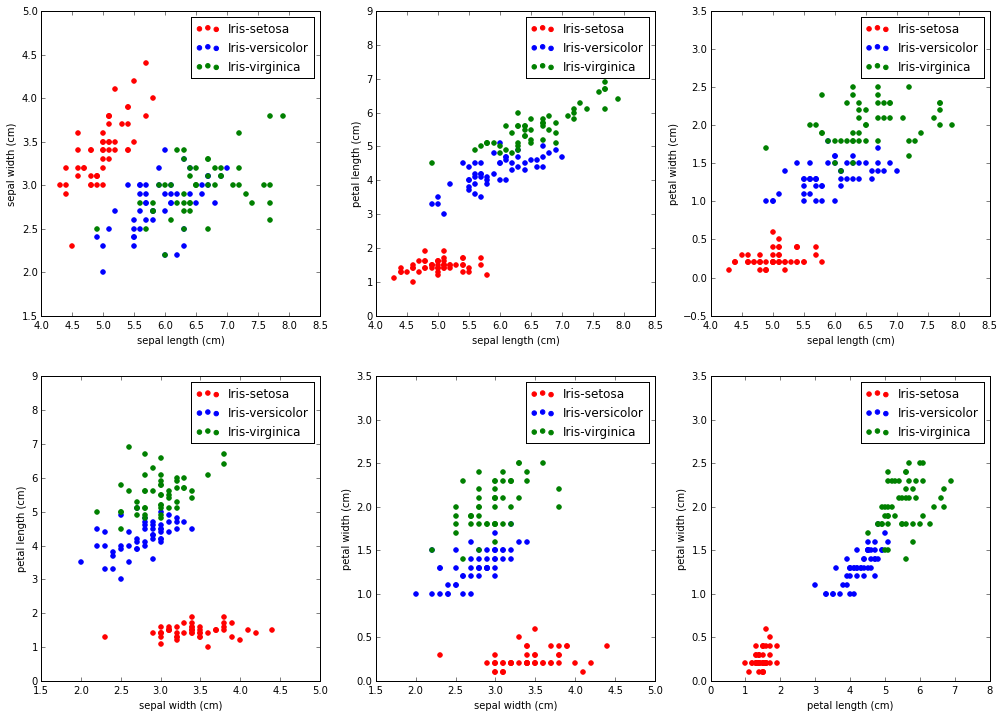

In [6]:
unit_str = ' (cm)'
options = {
    0: {
        'data_x': feature_names[0],
        'data_y': feature_names[1],
        'label_x': feature_names[0] + unit_str,
        'label_y': feature_names[1] + unit_str,
        'ylim_min': 1.5,
        'ylim_max': 5.0
    },
    1: {
        'data_x': feature_names[0],
        'data_y': feature_names[2],
        'label_x': feature_names[0] + unit_str,
        'label_y': feature_names[2] + unit_str,
        'ylim_min': 0.0,
        'ylim_max': 9.0
    },
    2: {
        'data_x': feature_names[0],
        'data_y': feature_names[3],
        'label_x': feature_names[0] + unit_str,
        'label_y': feature_names[3] + unit_str,
        'ylim_min': -0.5,
        'ylim_max': 3.5
    },
    3: {
        'data_x': feature_names[1],
        'data_y': feature_names[2],
        'label_x': feature_names[1] + unit_str,
        'label_y': feature_names[2] + unit_str,
        'ylim_min': 0.0,
        'ylim_max': 9.0
    },
    4: {
        'data_x': feature_names[1],
        'data_y': feature_names[3],
        'label_x': feature_names[1] + unit_str,
        'label_y': feature_names[3] + unit_str,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    5: {
        'data_x': feature_names[2],
        'data_y': feature_names[3],
        'label_x': feature_names[2] + unit_str,
        'label_y': feature_names[3] + unit_str,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    }
}
ax = []
fig = plt.figure(figsize=(17, 12))
for i in range(0,6):
    ax.append(fig.add_subplot(230 + (i+1)))

for i in range(0,6):
    se = ax[i].scatter(Iris_Se_Sub_Df[options[i]['data_x']], Iris_Se_Sub_Df[options[i]['data_y']], color='red')
    ve = ax[i].scatter(Iris_Ve_Sub_Df[options[i]['data_x']], Iris_Ve_Sub_Df[options[i]['data_y']], color='blue')
    vi = ax[i].scatter(Iris_Vi_Sub_Df[options[i]['data_x']], Iris_Vi_Sub_Df[options[i]['data_y']], color='green')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((se, ve, vi), iris_names)

In [7]:
df2 = df.ix[:,0:4]
df2[0:5]

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


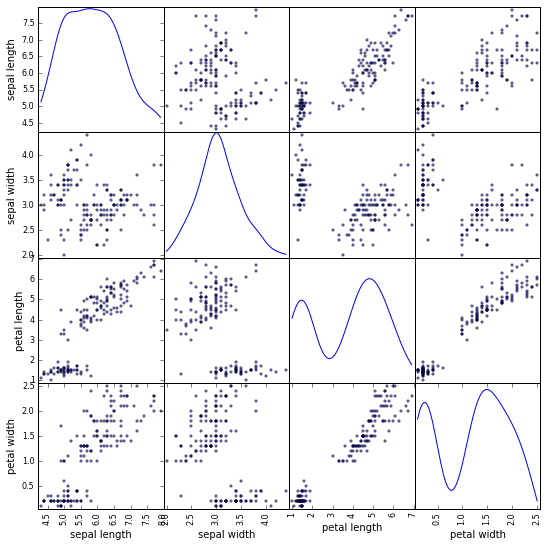

In [8]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(df2, figsize=(9, 9), diagonal='kde')

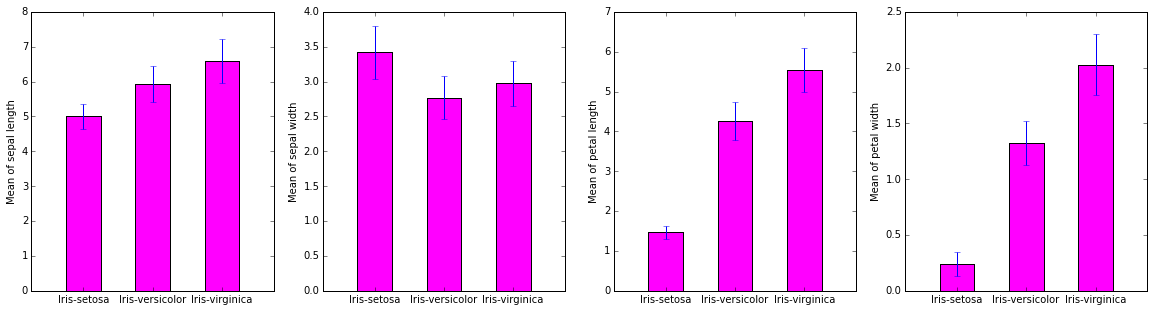

In [8]:
stats = {}
for i in range(0,4):
    stats[i] = {}
    stats[i]['mean'] = (Iris_Se_Sub_Df[feature_names[i]].mean(), 
                        Iris_Ve_Sub_Df[feature_names[i]].mean(), 
                        Iris_Vi_Sub_Df[feature_names[i]].mean())
    stats[i]['std'] = (Iris_Se_Sub_Df[feature_names[i]].std(), 
                       Iris_Ve_Sub_Df[feature_names[i]].std(), 
                       Iris_Vi_Sub_Df[feature_names[i]].std())
    
ind = Series([0.5, 1.5, 2.5])
width = 0.5
fig = plt.figure(figsize=(20, 5))
ay = []
for i in range(0,4):
    ay.append(fig.add_subplot(140 + (i+1)))
    
for i in range(0,4):
    ay[i].bar(ind, stats[i]['mean'], 0.5, color='magenta', yerr=stats[i]['std'])
    ay[i].set_xlim([0, 3.5])
    ay[i].set_ylabel('Mean of ' + feature_names[i])
    ay[i].set_xticks(ind + width/2)
    ay[i].set_xticklabels(iris_names)

## 4. scikit 활용한 데이터 탐색

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
print type(iris)

<class 'sklearn.datasets.base.Bunch'>


In [3]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [9]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [11]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [12]:
iris.data[50:55]

array([[ 7. ,  3.2,  4.7,  1.4],
       [ 6.4,  3.2,  4.5,  1.5],
       [ 6.9,  3.1,  4.9,  1.5],
       [ 5.5,  2.3,  4. ,  1.3],
       [ 6.5,  2.8,  4.6,  1.5]])

In [13]:
iris.target[50:55]

array([1, 1, 1, 1, 1])